In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
df=pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## TASK1-
 Find the linear regression equation for mileage vs price.

In [ ]:
df.shape

(804, 12)

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df = df.drop_duplicates()

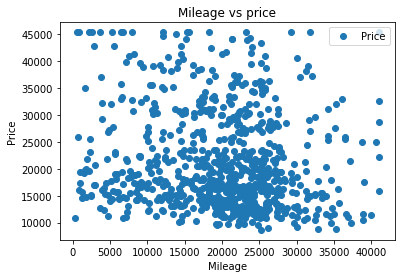

In [ ]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.138996
Price,-0.138996,1.000000


In [ ]:
percentile25=df['Mileage'].quantile(0.25)
percentile75=df['Mileage'].quantile(0.75)
iqr=percentile75-percentile25
print("IQR= ",iqr)
print("percentile25=",percentile25)
print("percentile75=",percentile75)

IQR=  10589.5
percentile25= 14623.5
percentile75= 25213.0


In [ ]:
upper=percentile75+(1.5*iqr)
lower=percentile25-(1.5*iqr)
print("upperlimit",upper)
print("lowerlimit",lower)

upperlimit 41097.25
lowerlimit -1260.75


In [ ]:
df["Mileage"] = np.where(df["Mileage"] >41097, 41097,df['Mileage'])
df["Mileage"] = np.where(df["Mileage"] <-1260, -1260,df['Mileage'])

In [ ]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
percentile_25=df['Price'].quantile(0.25)
percentile_75=df['Price'].quantile(0.75)
iqr=percentile_75-percentile_25
print("IQR= ",iqr)
print("percentile25=",percentile_25)
print("percentile75=",percentile_75)

IQR=  12444.242765331575
percentile25= 14273.073870330325
percentile75= 26717.3166356619


In [ ]:
upper=percentile_75+(1.5*iqr)
lower=percentile_25-(1.5*iqr)
print("upperlimit",upper)
print("lowerlimit",lower)

upperlimit 45383.68078365926
lowerlimit -4393.290277667038


In [ ]:
df["Price"] = np.where(df["Price"] >45383, 45383,df['Price'])
df["Price"] = np.where(df["Price"] <-4393, -4393,df['Price'])

In [ ]:
x = df.loc[:, ['Mileage']].values
y = df.loc[:, 'Price'].values 

print(x.shape)


print(y.shape)

(804, 1)
(804,)


In [ ]:
linreg = linear_model.LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [ ]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 24162.190855494897
coefficient: [-0.15460159]


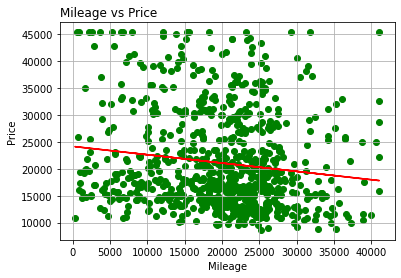

In [ ]:
plt.scatter(x, y, color='green')
plt.plot(x, linreg.predict(x), color='red')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price",loc='left')
plt.grid()
plt.show()

In [ ]:
print('r-squared: ', linreg.score(x, y))

r-squared:  0.01931992877024924



**The r sqaure value is very very poor, this is not a perfect model**

TASK 2
Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
Find the combination of the factors that is the best predictor for price.

In [ ]:
x = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values 
y = df['Price'].values 

In [ ]:
linreg = linear_model.LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [ ]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 7822.368105348874
coefficient: [-1.54475654e-01  2.25048275e+03  7.92304697e+02 -9.33158183e+02
  6.19256476e+03 -2.31800546e+03  3.14935548e+03]


In [ ]:
print('r-squared: ', linreg.score(x, y))


r-squared:  0.4584616615883823
